In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/prepro_categorical/ks-projects-201801.csv', nrows=30000)
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [ ]:
df = df.drop(columns=['ID','name','deadline', 'goal', 'launched', 'pledged', 'backers', 'usd pledged', 'usd_pledged_real'])
df.head()

,category,main_category,currency,state,country,usd_goal_real
0,Poetry,Publishing,GBP,failed,GB,1533.95
1,Narrative Film,Film & Video,USD,failed,US,30000.00
2,Narrative Film,Film & Video,USD,failed,US,45000.00
3,Music,Music,USD,failed,US,5000.00
4,Film & Video,Film & Video,USD,canceled,US,19500.00


In [ ]:
df.isnull().sum()

category         0
main_category    0
currency         0
state            0
country          0
usd_goal_real    0
dtype: int64

In [ ]:
df.nunique()#カテゴリの数を確認する

category          159
main_category      15
currency           14
state               6
country            23
usd_goal_real    7354
dtype: int64

In [ ]:
df['category'].value_counts()#それぞれのカテゴリにいくつデータが属しているか

Product Design     1741
Documentary        1252
Music              1200
Tabletop Games     1131
Shorts             1001
                   ... 
Quilts                6
Taxidermy             2
Chiptune              2
Residencies           1
Literary Spaces       1
Name: category, Length: 159, dtype: int64

In [ ]:
success_rate = round(df['state'].value_counts() / len(df['state']),2) 
success_rate

failed        0.52
successful    0.36
canceled      0.10
undefined     0.01
live          0.01
suspended     0.00
Name: state, dtype: float64

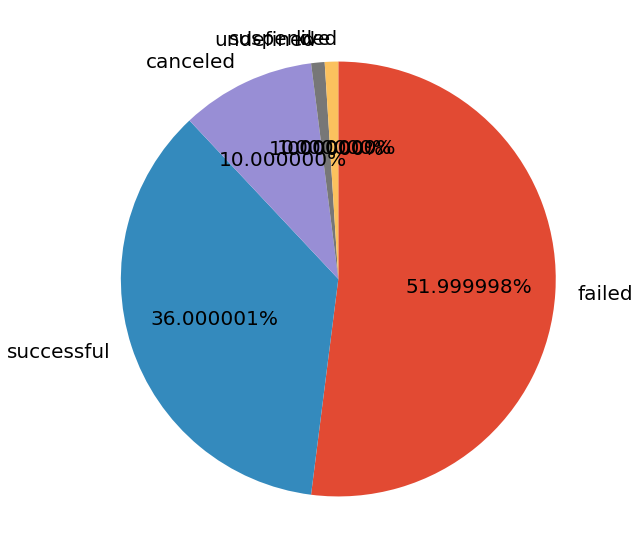

In [ ]:
#円グラフで可視化する
plt.figure(figsize=(10,10))
plt.pie(success_rate,
        labels=success_rate.index,
        startangle=90,
        autopct='%0f%%',
        textprops={'fontsize': 20},
        counterclock=False)

plt.show()

<BarContainer object of 15 artists>

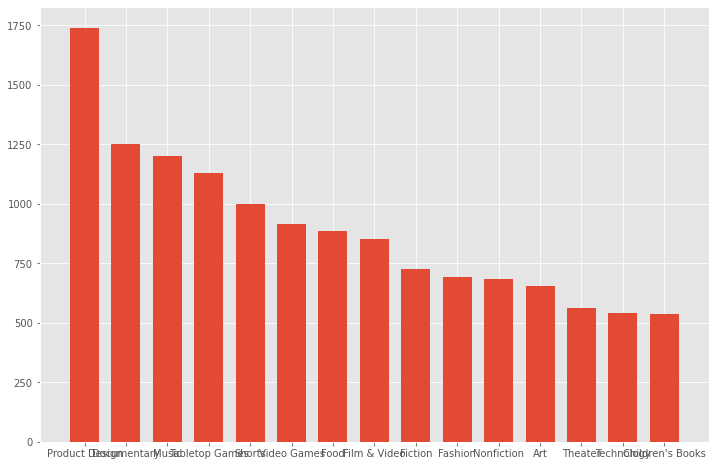

In [ ]:
plt.figure(figsize=(12,8))
plt.bar(x=df['category'].value_counts().index[:15],
       height=df['category'].value_counts()[:15], 
       width=0.7)

In [ ]:
#カテゴリ別の成功率を計算する
category = df['main_category'].value_counts()
category_success = df[df['state'] == 'successful']['main_category'].value_counts()

In [ ]:
category_success_rate = round(category_success / category, 2).sort_values(ascending=False)
category_success_rate

Theater         0.60
Dance           0.57
Comics          0.56
Music           0.47
Art             0.41
Film & Video    0.38
Games           0.36
Design          0.34
Photography     0.31
Publishing      0.30
Food            0.26
Fashion         0.25
Crafts          0.24
Technology      0.22
Journalism      0.21
Name: main_category, dtype: float64

In [ ]:
#カテゴリごとに数値データを集計
df.groupby('main_category').sum()

,usd_goal_real
main_category,
Art,5.194188e+07
Comics,7.723597e+06
Crafts,4.958846e+06
Dance,3.044371e+06
Design,8.453469e+07
Fashion,2.496166e+07
Film & Video,2.448022e+08
Food,6.847047e+07
Games,7.630147e+07


In [ ]:
trace = go.Bar(
    x=df.groupby('main_category').sum().index,
    y=df.groupby('main_category').sum()['usd_goal_real'],
    name="usd_goal_real"
)

layout = go.Layout(title='Bar', 
                   legend=dict(orientation='h'))

data=[trace]
fig = go.Figure(data, layout=layout)
iplot(fig)


In [ ]:
groupby = df.groupby('main_category').sum().sort_values('usd_goal_real',ascending=False)

trace = go.Bar(
    x = groupby.index,
    y = groupby['usd_goal_real'],
    name = 'usd_real_goal'    
)

layout = go.Layout(title='Bar',
                    legend=dict(orientation='h'))
data = [trace]
fig = go.Figure(data, layout=layout)
iplot(fig)

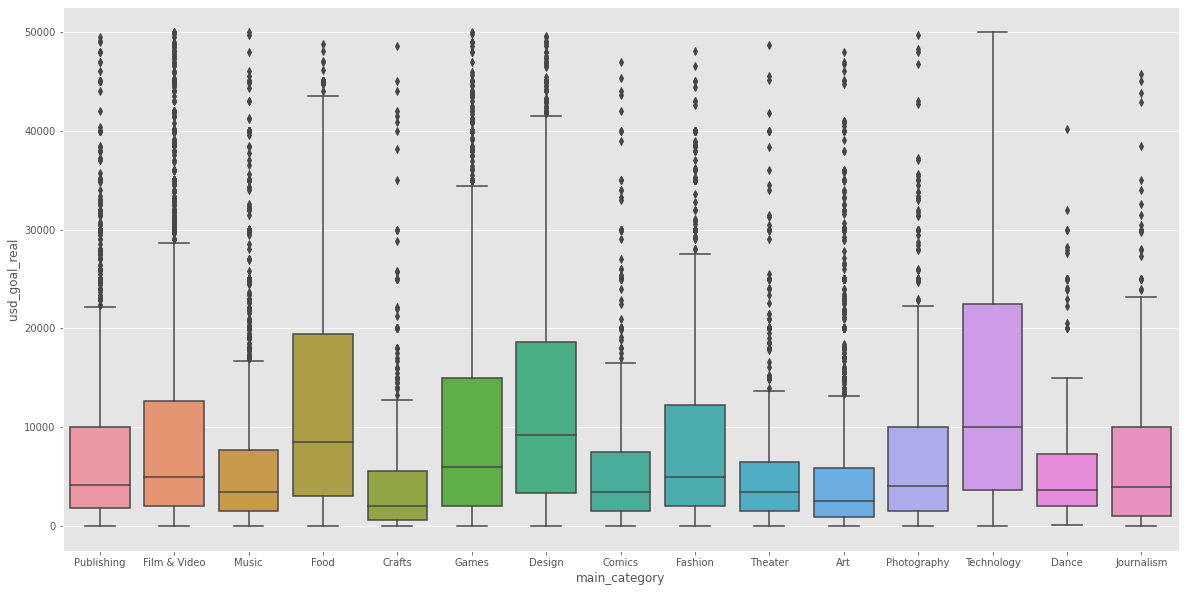

In [ ]:
#箱ヒゲ図を描画
df = df[df['usd_goal_real'] < 50000]

plt.figure(figsize=(20,10))
sns.boxplot(data=df,
            x=df['main_category'],
            y=df['usd_goal_real'])

In [ ]:
#ダミー変数化
pd.get_dummies(df['currency']).head()

,AUD,CAD,CHF,DKK,EUR,GBP,HKD,JPY,MXN,NOK,NZD,SEK,SGD,USD
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
pd.get_dummies(df['currency'], drop_first=True).head()

,CAD,CHF,DKK,EUR,GBP,HKD,JPY,MXN,NOK,NZD,SEK,SGD,USD
0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
#カテゴリの集約
def others(currency):
    return np.where((currency == 'MXN') | (currency == 'SEK') | (currency == 'NZD') | (currency == 'DKK') |
                    (currency == 'NOK') | (currency == 'HKD') | (currency == 'CHF') | (currency == 'SGD') |
                    (currency == 'JPY'), 'Others', currency)

In [ ]:
df['currency'] = others(df['currency'])
df['currency'].value_counts()

USD       21171
GBP        2486
EUR        1190
CAD        1116
Others      635
AUD         557
Name: currency, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder


In [ ]:
cat_features = ['category', 'main_category', 'currency', 'state', 'country']

for col in cat_features:
  lbl = LabelEncoder()
  df[col] = lbl.fit_transform(df[col].values)

df.head()

,category,main_category,currency,state,country,usd_goal_real
0,108,12,3,1,9,1533.95
1,93,6,5,1,22,30000.00
2,93,6,5,1,22,45000.00
3,90,10,5,1,22,5000.00
4,55,6,5,0,22,19500.00


In [1]:
!echo "# prepro_practice" >> README.md

In [2]:
!git init

Initialized empty Git repository in /content/.git/


In [3]:
!git add README.md

In [6]:
!git commit -m "first commit"

[master (root-commit) b163c0c] first commit
 1 file changed, 1 insertion(+)
 create mode 100644 README.md


In [5]:
!git config --global user.email "you@example.com"

In [ ]:
!git config --global user

In [28]:
!git branch -M main

In [32]:
!git remote add origin https://github.com/matsudsatsuki/prepro_practice.git

fatal: remote origin already exists.


In [33]:
!cd drive/MyDrive/prepro_categorical/

In [34]:
!git add drive/MyDrive/prepro_categorical/Prepro_categorical.ipynb

In [27]:
!git commit -m 'first commit' 

[main 30ef68d] first commit
 1 file changed, 1 insertion(+)
 create mode 100644 drive/MyDrive/prepro_categorical/Prepro_categorical.ipynb


In [31]:
!git push -u origin main

fatal: could not read Username for 'https://github.com': No such device or address
